In [9]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pandas as pd
import seaborn as sns



sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

In [4]:
path = '../../Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

Number of entries:  249
Total size of trajectories:  713.1385802486911 Gb
Total time of trajectories:  126796.1 ns


Text(0, 0.5, 'Distribution')

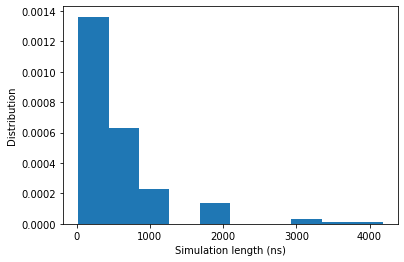

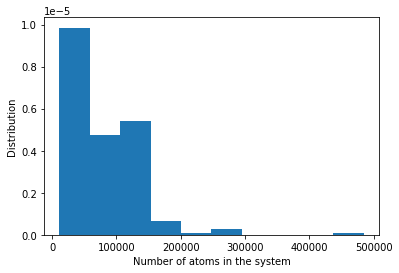

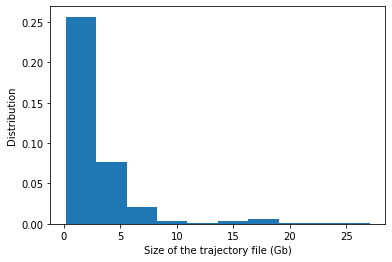

In [5]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

distSIMl = plt.hist(SimulationLengths, density=True)
plt.xlabel('Simulation length (ns)')
plt.ylabel('Distribution')
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

In [6]:
compositions = {}
for lipid in lipids_dict:
    compositions[lipid] = {}

for key in compositions:
    for lipid in lipids_dict:
        compositions[key][lipid] = 0

    
for system in systems:
    lipids_in_system = []
    for mol in system['COMPOSITION']:
        if mol in lipids_dict:
            lipids_in_system.append(mol)
    
    for lipid1 in lipids_in_system:
        for lipid2 in lipids_in_system:
            if lipid1 != lipid2:
                compositions[lipid1][lipid2] += 1
            #print(mol,system['COMPOSITION'][mol]['COUNT'])
            #compositions[mol] =
    
    if len(lipids_in_system) == 1:
        lipid = lipids_in_system[0]
        compositions[lipid][lipid] += 1


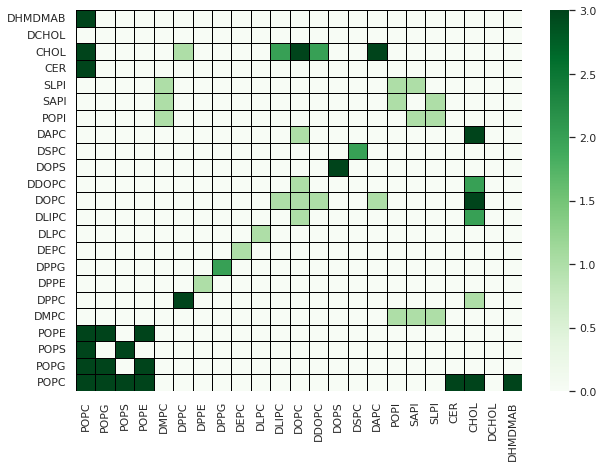

In [7]:
df = pd.DataFrame(compositions)
z=df.values

sns.set(rc = {'figure.figsize':(10,7)})
ax = sns.heatmap(df, cmap = 'Greens', vmin =0, vmax = 3, linewidths = 1, linecolor = 'black')
ax.invert_yaxis()

In [10]:
db_data.pie_temperature()

NameError: name 'plt' is not defined

In [10]:
temps = [ int(float(system['TEMPERATURE'])) for system in systems]

In [11]:
import collections
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

NameError: name 'temps' is not defined